In [77]:
#Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Libraries required for NLP
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet,stopwords
import string
from requests import get

# Library for Collaborative filtering
from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lalwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
movies_metadata = pd. read_csv('movies_metadata.csv')
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [4]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


##### Features
- adult: Indicates if the movie is X-Rated or Adult.
- belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
- budget: The budget of the movie in dollars.
- genres: A stringified list of dictionaries that list out all the genres associated with the movie.
- homepage: The Official Homepage of the move.
- id: The ID of the movie.
- imdb_id: The IMDB ID of the movie.
- original_language: The language in which the movie was originally shot in.
- original_title: The original title of the movie.
- overview: A brief blurb of the movie.
- popularity: The Popularity Score assigned by TMDB.
- poster_path: The URL of the poster image.
- production_companies: A stringified list of production companies involved with the making of the movie.
- production_countries: A stringified list of countries where the movie was shot/produced in.
- release_date: Theatrical Release Date of the movie.
- revenue: The total revenue of the movie in dollars.
- runtime: The runtime of the movie in minutes.
- spoken_languages: A stringified list of spoken languages in the film.
- status: The status of the movie (Released, To Be Released, Announced, etc.)
- tagline: The tagline of the movie.
- title: The Official Title of the movie.
- video: Indicates if there is a video present of the movie with TMDB.
- vote_average: The average rating of the movie.
- vote_count: The number of votes by users, as counted by TMDB.

In [5]:
#Reading the movies from our small movies data set
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [7]:
#Checking Null values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Creating a plot for Genre Distribution

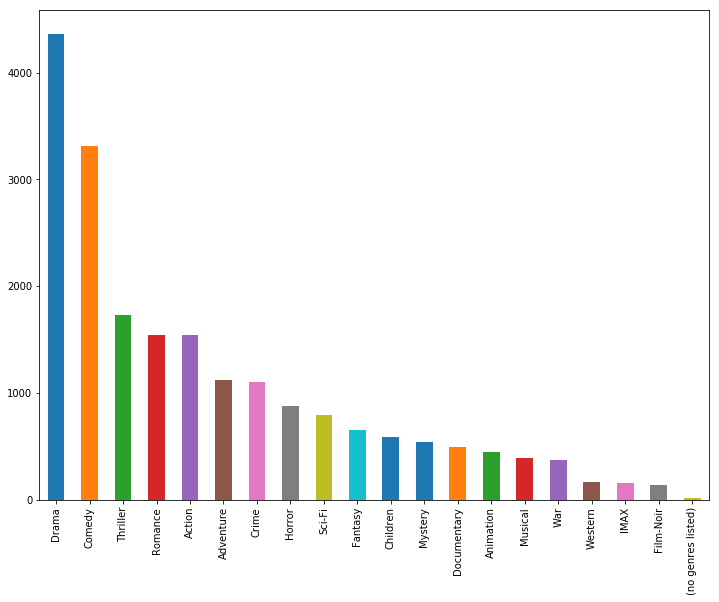

In [8]:
df1 = movies['genres'].apply(lambda genrelist : str(genrelist).split("|"))
df1 = pd.Series(df1).apply(frozenset).to_frame(name='givengenres')
for givengenres in frozenset.union(*df1.givengenres):
    df1[givengenres] = df1.apply(lambda _: int(givengenres in _.givengenres), axis=1)
df1.drop('givengenres',axis=1,inplace=True)
df1['movieId']=movies['movieId']
df1 = pd.merge(movies,df1,on='movieId')
df1.head()
genre_columns= ['Film-Noir',
       'Romance', 'Western', 'Documentary', 'Thriller', 'Action', 'Musical',
       'War', 'Drama', 'IMAX', 'Crime', 'Children', 'Adventure', 'Horror',
       'Fantasy', 'Animation', 'Comedy', 'Mystery', '(no genres listed)',
       'Sci-Fi']
df1[genre_columns].sum().sort_values(ascending=False).plot(kind='bar',figsize=(12,9))

# This shows that users of movielens prefer Drama movies more than any other genre.

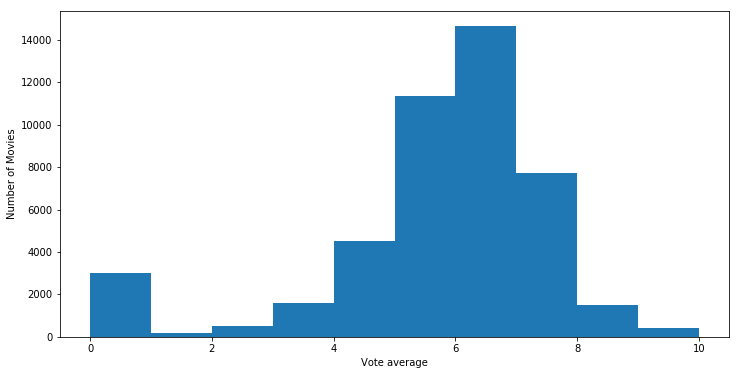

In [9]:
# Lets look into the distribution of vote average for out movies dataset
plt.subplots(figsize=(12,6))
ax = movies_metadata['vote_average'].plot(kind='hist')
plt.xlabel('Vote average')
plt.ylabel('Number of Movies')
plt.show()

In [10]:
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
imdbId     9125 non-null int64
tmdbId     9112 non-null float64
dtypes: float64(1), int64(2)
memory usage: 213.9 KB


In [12]:
#Checking Null Values
links.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [13]:
movies_metadata.id.isnull().sum()

0

In [14]:
links.tmdbId.isnull().sum()

13

# Since we are using movies small dataset, we will only keep values in movies_metadata for movies in movies

In [15]:
movies_metadata = movies_metadata[movies_metadata.id.isin(links['tmdbId'].astype(str).apply(lambda x:x[:-2]).tolist())]

In [16]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


# Creating a list of genres from the json format provided

In [17]:
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [18]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


# We also need to add Movie Id to our movies metadata, we can do it through links.csv

In [19]:
def convert_int(x):
    try:
        return int(x) 
    except:
        return 0

In [20]:
links['tmdbId'] = links['tmdbId'].apply(convert_int)
links['tmdbId']

0          862
1         8844
2        15602
3        31357
4        11862
5          949
6        11860
7        45325
8         9091
9          710
10        9087
11       12110
12       21032
13       10858
14        1408
15         524
16        4584
17           5
18        9273
19       11517
20        8012
21        1710
22        9691
23       12665
24         451
25       16420
26        9263
27       17015
28         902
29       37557
         ...  
9095    308531
9096    341012
9097    259693
9098    328429
9099     43074
9100    302699
9101    324668
9102    278348
9103    258489
9104    316727
9105    316023
9106    177869
9107    353571
9108    399106
9109    328387
9110    368620
9111    401387
9112    373348
9113    338766
9114    390734
9115    314420
9116    390989
9117    159550
9118    410612
9119    392572
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9125, dtype: int64

In [21]:
movies_metadata['id'] = movies_metadata['id'].apply(convert_int)

In [22]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [23]:
def return_movieId(tmdbId):
    return links[links['tmdbId']==tmdbId]['movieId'].iloc[0]

In [24]:
#Get movie Id to the movies_metadata
movies_metadata['movieId'] = movies_metadata['id'].apply(return_movieId)
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,6
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,7
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,8
8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,9
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,10


In [25]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 45265
Data columns (total 25 columns):
adult                    9099 non-null object
belongs_to_collection    1674 non-null object
budget                   9099 non-null object
genres                   9099 non-null object
homepage                 1974 non-null object
id                       9099 non-null int64
imdb_id                  9099 non-null object
original_language        9099 non-null object
original_title           9099 non-null object
overview                 9087 non-null object
popularity               9099 non-null object
poster_path              9096 non-null object
production_companies     9099 non-null object
production_countries     9099 non-null object
release_date             9099 non-null object
revenue                  9099 non-null float64
runtime                  9099 non-null float64
spoken_languages         9099 non-null object
status                   9097 non-null object
tagline          

In [26]:
def pir(df,c):
    colc = df[c].str.split('|')
    clst = colc.values.tolist()
    lens = [len(l) for l in clst]

    cdf = pd.DataFrame({c: np.concatenate(clst)}, df.index.repeat(lens))
    return df.drop(c, 1).join(cdf).reset_index(drop=True)

In [27]:
pir(movies, "genres" )

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
5,2,Jumanji (1995),Adventure
6,2,Jumanji (1995),Children
7,2,Jumanji (1995),Fantasy
8,3,Grumpier Old Men (1995),Comedy
9,3,Grumpier Old Men (1995),Romance


###  Since some movies may have low vote average but more number of votes, while other movies may have high vote average and less vote counts, We need a common medium to sort the movies to create top movies chart. For this, let's use IMDB's weighted rating formula to construct top movies chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = (v/(v+m)) R+(m/(v+m)) C

Where, 
R = average for the movie (mean) = (Rating)
v = number of votes for the movie = (votes)
m = minimum votes required to be listed in the 
C = the mean vote across the whole report 

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

I will build our overall Top 100 Chart and will define a function to build charts for a particular genre.

##### finding mean of votes

In [28]:
no_of_votes = movies_metadata[movies_metadata['vote_count'].notnull()]['vote_count'].astype('int')
vote_mean = movies_metadata[movies_metadata['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_mean.mean()
C

5.916804044400483

In [29]:
m = no_of_votes.quantile(0.95)
m

2079.1000000000004

In [30]:
# Adding year column based on movies release date
movies_metadata['year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [31]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,1995
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,6,1995
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,7,1995
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,8,1995
8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,9,1995
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,10,1995


In [32]:
top_movies = movies_metadata[(movies_metadata['vote_count'] >= m) & (movies_metadata['vote_count'].notnull()) & (movies_metadata['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
top_movies['vote_count'] = top_movies['vote_count'].astype('int')
top_movies['vote_average'] = top_movies['vote_average'].astype('int')
top_movies.shape

(455, 6)

In [33]:
top_movies

,title,year,vote_count,vote_average,popularity,genres
0,Toy Story,1995,5415,7,21.9469,"[Animation, Comedy, Family]"
1,Jumanji,1995,2413,6,17.0155,"[Adventure, Fantasy, Family]"
31,Twelve Monkeys,1995,2470,7,12.2973,"[Science Fiction, Thriller, Mystery]"
46,Se7en,1995,5915,8,18.4574,"[Crime, Mystery, Thriller]"
49,The Usual Suspects,1995,3334,8,16.3025,"[Drama, Crime, Thriller]"
108,Braveheart,1995,3404,7,20.7551,"[Action, Drama, History, War]"
109,Taxi Driver,1976,2632,8,14.0927,"[Crime, Drama]"
162,Die Hard: With a Vengeance,1995,2094,6,15.1389,"[Action, Thriller]"
256,Star Wars,1977,6778,8,42.1497,"[Adventure, Action, Science Fiction]"
289,Leon: The Professional,1994,4293,8,20.4773,"[Thriller, Crime, Drama]"


### Therefore, to qualify to be considered for the chart, a movie has to have at least 2079 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.916 on a scale of 10. 455 Movies qualify to be on our chart.

In [34]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [35]:
top_movies['wr'] = top_movies.apply(weighted_rating, axis=1)

In [36]:
top_movies = top_movies.sort_values('wr', ascending=False).head(100)

In [37]:
top_movies.to_csv("topmovies.csv",index = False)


In [38]:
tm = pd.read_csv("topmovies.csv")
tm

,title,year,vote_count,vote_average,popularity,genres,wr
0,Inception,2010,14075,8,29.108149,"['Action', 'Thriller', 'Science Fiction', 'Mys...",7.731884
1,The Dark Knight,2008,12269,8,123.167259,"['Drama', 'Action', 'Crime', 'Thriller']",7.698136
2,Interstellar,2014,11187,8,32.213481,"['Adventure', 'Drama', 'Science Fiction']",7.673516
3,Fight Club,1999,9678,8,63.869599,['Drama'],7.631612
4,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"['Adventure', 'Fantasy', 'Action']",7.605220
5,Pulp Fiction,1994,8670,8,140.950236,"['Thriller', 'Crime']",7.597066
6,The Shawshank Redemption,1994,8358,8,51.645403,"['Drama', 'Crime']",7.585021
7,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"['Adventure', 'Fantasy', 'Action']",7.579706
8,Forrest Gump,1994,8147,8,48.307194,"['Comedy', 'Drama', 'Romance']",7.576459
9,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"['Adventure', 'Fantasy', 'Action']",7.554411


# spliting genre column and adding it to new row

In [39]:
y = movies_metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
y.name = 'genre'
gen_data = movies_metadata.drop('genres', axis=1).join(y)

In [40]:
gen_data.to_csv("Forgenre.csv",index =False)

In [41]:
forgenre = pd.read_csv("Forgenre.csv")
forgenre

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,1995,Animation
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,1995,Comedy
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,1995,Family
3,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,1995,Adventure
4,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,1995,Fantasy
5,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,1995,Family
6,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,1995,Romance
7,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,1995,Comedy
8,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,1995,Comedy
9,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,1995,Drama


#### Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the 85th percentile instead of 95.

In [42]:
def top_movies_genre(genre, percentile=0.85):
    df = gen_data[gen_data['genre'] == genre]
    no_of_votes = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_mean = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_mean.mean()
    m = no_of_votes.quantile(percentile)
    
    top_movies = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    top_movies['vote_count'] = top_movies['vote_count'].astype('int')
    top_movies['vote_average'] = top_movies['vote_average'].astype('int')
    
    top_movies['wr'] = top_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    top_movies = top_movies.sort_values('wr', ascending=False).head(100)
    
    return top_movies

#### Lets look upon Top 10 animation movies

In [43]:
top_movies_genre('Animation').head(10)

,title,year,vote_count,vote_average,popularity,wr
359,The Lion King,1994,5520,8,21.6058,7.592229
5481,Spirited Away,2001,3968,8,41.0489,7.481030
9698,Howl's Moving Castle,2004,2049,8,16.136,7.217022
2884,Princess Mononoke,1997,2041,8,17.1667,7.215358
5833,My Neighbor Totoro,1988,1730,8,13.5073,7.144693
13724,Up,2009,7048,7,19.3309,6.859731
30315,Inside Out,2015,6737,7,23.9856,6.854574
15472,Despicable Me,2010,6595,7,22.2745,6.852092
12704,WALL·E,2008,6439,7,16.0884,6.849265
6232,Finding Nemo,2003,6292,7,25.4978,6.846500


In [44]:
top_movies_genre('Mystery').head(10)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.1081,7.876110
46,Se7en,1995,5915,8,18.4574,7.728774
11354,The Prestige,2006,4510,8,16.9456,7.658936
4099,Memento,2000,4168,8,15.4508,7.636130
9430,Oldboy,2003,2000,8,10.6169,7.368398
877,Rear Window,1954,1531,8,17.9113,7.248834
896,Citizen Kane,1941,1244,8,15.8119,7.150416
876,Vertigo,1958,1162,8,18.2082,7.117375
14825,Shutter Island,2010,6559,7,15.8136,6.878154
23675,Gone Girl,2014,6023,7,154.801,6.868783


## Content Based Recommender
The simple recommender that we just built provides just the top results for the genre, and it shows the the same results for every user looking for that genre.

It also dosen't account for fan following towards particular director or Actors, which accounts for people also watching the movies that are less popular but from famous actors and directors.

For personalized recommendations, We will create a recommendation system that computes similarity between movies based on certain features and recommend movies that are similar to user's taste. As we are using movie's metadata (or content) for creating this system, it is also referred as Content Based Filtering.

We will build four Content Based Recommenders based on:

- Movie overview's that particular user has liked and use latent semantic similarity for comparing similar movies
- Adding Taglines and Movie Overviews and compare using pairwise cosine similarity
- Movie Cast, Crew, Keywords and Genre


#### Movie Description Based Recommender
Let us first try to build a recommender using movie descriptions and taglines. We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [45]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,1995


For our first attempt in building Description based recommendation system,
- We will first take list of movies which a user has watched
- Process the description of the movie using NLP techniques like removing stopwords and punctuations, applying Tokenization, lemmatization and stemming, and return a clean list of words
- Using similar techniques, we will process the description/overview of movie in our movies_metadata for the top 80 percentile of movies
- In the next step, we will calculate the similarity between the combined overview of the movies user has watched and the overview of the movies user hasn't watched
- To get this similarity, we will use UMBC's API service to provide latent semantic similarity between 2 scentences. The link to which can be found [here](http://swoogle.umbc.edu/SimService/api.html)

In [46]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [47]:
#Get movieId for above average ratings for userId 1
ratings[(ratings['userId']==1) & (ratings['rating']>2.5)]['movieId'].tolist()

[1029, 1061, 1172, 1339, 1953, 2105, 2150, 3671]

In [48]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. apply lemmatization
    4. apply stemmization
    5. return list clean overview
    
    """
    #Remove Stopwords and punctuations
    nopunc = [char for char in mess if char not in string.punctuation]
    stopwords = nltk.corpus.stopwords.words('english')
    nopunc = ''.join(nopunc)
    
    #Apply tokenization
    tokenized_list = []
    tokenized_list =  [word for word in nopunc.split() if word.lower() not in stopwords]
    
    
    wordnet_lemmatizer = WordNetLemmatizer()
    snowball_stemmer = SnowballStemmer('english')

    #Applying Lemmatization
    
    lemmatized_words = []
    for word in tokenized_list:
        lemmatized_words.append(wordnet_lemmatizer.lemmatize(word))

   #Applying Stemmization
   
    cleaned_list  = []
    for word in lemmatized_words:
        cleaned_list.append(snowball_stemmer.stem(word))
    return ' '.join(cleaned_list)

In [49]:
movies_metadata['overview'] = movies_metadata['overview'].astype(str)

In [50]:
# Pre-processing the overviews for all the movies
movies_metadata['pro_overview'] = movies_metadata['overview'].apply(text_process)

In [51]:
percentile = 0.90
no_of_votes = movies_metadata[movies_metadata['vote_count'].notnull()]['vote_count'].astype('int')
vote_mean = movies_metadata[movies_metadata['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_mean.mean()
m = no_of_votes.quantile(percentile)

top_movies = movies_metadata[(movies_metadata['vote_count'] >= m) & (movies_metadata['vote_count'].notnull()) & (movies_metadata['vote_average'].notnull())][['movieId','title', 'year', 'vote_count', 'vote_average', 'popularity','pro_overview']]
top_movies['vote_count'] = top_movies['vote_count'].astype('int')
top_movies['vote_average'] = top_movies['vote_average'].astype('int')

In [52]:
top_movies.sort_values(by='vote_count',ascending=False).head()

,movieId,title,year,vote_count,vote_average,popularity,pro_overview
15480,79132,Inception,2010,14075,8,29.1081,cobb skill thief commit corpor espionag infilt...
12481,58559,The Dark Knight,2008,12269,8,123.167,batman rais stake war crime help lt jim gordon...
14551,72998,Avatar,2009,12114,7,185.071,22nd centuri parapleg marin dispatch moon pand...
17818,89745,The Avengers,2012,12000,7,89.8876,unexpect enemi emerg threaten global safeti se...
26564,122904,Deadpool,2016,11444,7,187.86,deadpool tell origin stori former special forc...


In [53]:
len(top_movies)

910

In [54]:
# Using UMBC's API service to get latent sematic similarity score
sss_url = "http://swoogle.umbc.edu/SimService/GetSimilarity"

def sss(s1, s2, type='relation', corpus='webbase'):
    try:
        response = get(sss_url, params={'operation':'api','phrase1':s1,'phrase2':s2,'type':type,'corpus':corpus})
        return float(response.text.strip())
    except:
        #print ('Error in getting similarity for %s: %s' % ((s1,s2), response))
        return 0.0

In [55]:
user_1_movies=[]
for movieId in ratings[(ratings['userId']==1) & (ratings['rating']>2.5)]['movieId'].tolist():
    user_1_movies.append(movies_metadata[movies_metadata['movieId']==movieId]['pro_overview'].iloc[0])
user_1_movies = ' '.join(user_1_movies)

In [56]:
user_1_movies

'dumbo babi eleph born overs ear suprem lack confid thank even diminut buddi timothi mous pintsiz pachyderm learn surmount obstacl two gangster seek reveng state jail worker stay youth prison sexual abus sensat court hear take place charg crime move drama director barri levinson filmmak recal childhood fell love movi villag theater form deep friendship theater projectionist dracula leaf captiv jonathan harker transylvania london search mina harker spit imag dracula longdead wife elisabeta obsess vampir hunter dr van hels set end mad tough narcot detect popey doyl hot pursuit suav french drug dealer may key huge heroinsmuggl oper kevin flynn search proof invent hit video game digit laser find insid grid program suffer tyrann rule master control program help tron secur program flynn seek free grid mcp miseri brought small group sho kalahari desert form cola bottl quest throw evil object edg earth xixo encount western civil haphazard doctor tyran despot town – everyon seem name johnson – 

In [57]:
%%time
top_movies['similarity'] = top_movies['pro_overview'].apply(lambda x:sss(user_1_movies,x))

Wall time: 3min 10s


In [58]:
top_movies.head()

,movieId,title,year,vote_count,vote_average,popularity,pro_overview,similarity
0,1,Toy Story,1995,5415,7,21.9469,led woodi andi toy live happili room andi birt...,0.234470
1,2,Jumanji,1995,2413,6,17.0155,sibl judi peter discov enchant board game open...,0.270828
5,6,Heat,1995,1886,7,17.9249,obsess master thief neil mccauley lead topnotc...,0.221906
9,10,GoldenEye,1995,1194,6,14.686,jame bond must unmask mysteri head janus syndi...,0.153685
15,16,Casino,1995,1343,7,10.1374,life gambl paradis – las vega – dark mafia und...,0.092047


In [59]:
top_movies[top_movies.movieId.isin(ratings[ratings['userId']!=1]['movieId'].tolist())][['title','similarity','vote_count','vote_average']].sort_values(by='similarity',ascending=False).head(10)

,title,similarity,vote_count,vote_average
1000,Dumbo,0.587255,1206,6
20971,Epic,0.365386,1143,6
892,The Wizard of Oz,0.362549,1689,7
18973,Snow White and the Huntsman,0.361434,3183,5
24939,Dumb and Dumber To,0.361130,1140,5
16279,TRON: Legacy,0.356697,2895,6
9430,Oldboy,0.340289,2000,8
18499,Chronicle,0.340005,1965,6
19825,Rise of the Guardians,0.337160,1981,7
24278,Dracula Untold,0.333092,2439,6


In [60]:
def user_taste_recommender(userId,percentile = 0.90):
    no_of_votes = movies_metadata[movies_metadata['vote_count'].notnull()]['vote_count'].astype('int')
    vote_mean = movies_metadata[movies_metadata['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_mean.mean()
    m = no_of_votes.quantile(percentile)

    top_movies = movies_metadata[(movies_metadata['vote_count'] >= m) & (movies_metadata['vote_count'].notnull()) & (movies_metadata['vote_average'].notnull())][['movieId','title', 'year', 'vote_count', 'vote_average', 'popularity','pro_overview']]
    top_movies['vote_count'] = top_movies['vote_count'].astype('int')
    top_movies['vote_average'] = top_movies['vote_average'].astype('int')
    
    user_movies=[]
    for movieId in ratings[(ratings['userId']==userId) & (ratings['rating']>2.5)]['movieId'].tolist():
        user_movies.append(movies_metadata[movies_metadata['movieId']==movieId]['pro_overview'].iloc[0])
    user_movies = ' '.join(user_movies)
    
    top_movies['similarity'] = top_movies['pro_overview'].apply(lambda x:sss(user_movies,x))
    top_movies = top_movies[top_movies.movieId.isin(ratings[ratings['userId']!=userId]['movieId'].tolist())][['title','similarity','vote_count','vote_average']].sort_values(by='similarity',ascending=False).head(10)
    
    return top_movies

In [61]:
user_taste_recommender(100)

,title,similarity,vote_count,vote_average
600,Fargo,0.622953,2080,7
31,Twelve Monkeys,0.619132,2470,7
760,Independence Day,0.589538,3334,6
0,Toy Story,0.589521,5415,7
716,The Rock,0.585872,1474,6
638,Mission: Impossible,0.572218,2677,6
5,Heat,0.572186,1886,7
375,True Lies,0.478509,1138,6
21068,Man of Steel,0.446365,6462,6
892,The Wizard of Oz,0.445946,1689,7


Also, lets add tagline to the description and check if we get better recommendations

In [62]:
movies_metadata['tagline'] = movies_metadata['tagline'].fillna('')
movies_metadata['description'] = movies_metadata['pro_overview'] + movies_metadata['tagline']
movies_metadata['description'] = movies_metadata['description'].fillna('')

In [63]:
movies_metadata['description'].head()

0    led woodi andi toy live happili room andi birt...
1    sibl judi peter discov enchant board game open...
2    famili wed reignit ancient feud nextdoor neigh...
3    cheat mistreat step woman hold breath wait elu...
4    georg bank recov daughter wed receiv news shes...
Name: description, dtype: object

In [64]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_metadata['description'])

In [65]:
tfidf_matrix.shape

(9099, 264045)

#### Cosine Similarity
I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

cosine(x,y)=x.y⊺||x||.||y|| 
Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [66]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [67]:
cosine_sim

array([[1.        , 0.00973524, 0.        , ..., 0.        , 0.0025085 ,
        0.        ],
       [0.00973524, 1.        , 0.00525887, ..., 0.00416411, 0.00369688,
        0.        ],
       [0.        , 0.00525887, 1.        , ..., 0.        , 0.00284749,
        0.00505072],
       ...,
       [0.        , 0.00416411, 0.        , ..., 1.        , 0.02930263,
        0.        ],
       [0.0025085 , 0.00369688, 0.00284749, ..., 0.02930263, 1.        ,
        0.        ],
       [0.        , 0.        , 0.00505072, ..., 0.        , 0.        ,
        1.        ]])

We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [68]:
movies_metadata = movies_metadata.reset_index()
titles = movies_metadata['title']
indexes = pd.Series(movies_metadata.index, index=movies_metadata['title'])

In [69]:
#To get pairwise similarity score for movie with index 0
similarity =  list(enumerate(cosine_sim[0]))
print(similarity[:10])

[(0, 0.9999999999999999), (1, 0.009735244938882703), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0)]


In [70]:
def desc_based_recommendation(title):
    idx = indexes[title]
    sim = list(enumerate(cosine_sim[idx]))
    #Sorting the list by descending order of similarity
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    #Taking top 30 similar movies
    sim = sim[1:31]
    rec_movies_indexes = [i[0] for i in sim]
    return titles.iloc[rec_movies_indexes]

In [71]:
desc_based_recommendation('Star Wars')

949                          The Empire Strikes Back
962                               Return of the Jedi
8755                    Star Wars: The Force Awakens
6690                                 Shrek the Third
7539                             Shrek Forever After
4815                               Where Eagles Dare
2890                                   Shanghai Noon
5383                                         Shrek 2
5088                             The Thief of Bagdad
279                                The Swan Princess
7129                          The Tale of Despereaux
1653                                 Sleeping Beauty
414                             Hot Shots! Part Deux
2105                                       The Mummy
5177                                 The Magic Flute
950                               The Princess Bride
3792                                           K-PAX
5069                        The Legend of Suriyothai
515                                 Princess C

We get Return of Jedi and Star Wars: The Force Awakens as a recommendation for star wars which is pretty cool!

#### Metadata Based Recommender

Lets add more details like cast, crew , directors, keywords etc to get better similarity score for movies with similar content.
To do the same we need to prepare this data as our first step.

In [72]:
#loading data from credits.csv for cast and crew, and Keywords.csv for keywords related to movies
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

In [73]:
#Converting id's to int
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movies_metadata['id'] = movies_metadata['id'].astype('int')

In [74]:
# Add Cast and Crew column to our movies dataset
movies_metadata = movies_metadata.merge(credits, on='id')
#Add Keywords to the dataset
movies_metadata = movies_metadata.merge(keywords, on='id')

In [75]:
movies_metadata.head()

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,vote_average,vote_count,movieId,year,pro_overview,description,Unnamed: 0,cast,crew,keywords
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,7.7,5415.0,1,1995,led woodi andi toy live happili room andi birt...,led woodi andi toy live happili room andi birt...,0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,...,6.9,2413.0,2,1995,sibl judi peter discov enchant board game open...,sibl judi peter discov enchant board game open...,1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,...,6.5,92.0,3,1995,famili wed reignit ancient feud nextdoor neigh...,famili wed reignit ancient feud nextdoor neigh...,2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,...,6.1,34.0,4,1995,cheat mistreat step woman hold breath wait elu...,cheat mistreat step woman hold breath wait elu...,3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,...,5.7,173.0,5,1995,georg bank recov daughter wed receiv news shes...,georg bank recov daughter wed receiv news shes...,4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


After getting the data in a single dataframe, we can get the following from the data:
<p><b> Crew:</b>
Since director is the most important person in the crew of the movie, we will take it as our feature from the crew
<p><b>  Cast: </b>
We will take the first 3 actors from the Cast

In [76]:
#Checking for Python literal structures: strings, bytes, numbers, tuples, lists, dicts, sets, booleans, and None.
movies_metadata['cast'] = movies_metadata['cast'].apply(literal_eval)
movies_metadata['crew'] = movies_metadata['crew'].apply(literal_eval)
movies_metadata['keywords'] = movies_metadata['keywords'].apply(literal_eval)
#Get the cast and crew size
movies_metadata['cast_size'] = movies_metadata['cast'].apply(lambda x: len(x))
movies_metadata['crew_size'] = movies_metadata['crew'].apply(lambda x: len(x))

In [87]:
# function to get director from the dict of crew
def get_director(d):
    for i in d:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [88]:
movies_metadata['director'] = movies_metadata['crew'].apply(get_director)

In [89]:
movies_metadata['cast'] = movies_metadata['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_metadata['cast'] = movies_metadata['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [90]:
movies_metadata['keywords'] = movies_metadata['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

We will add genre, keywords, director and main actors and create count matrix using count vectorizer as we did in Description based recommender and follow similar steps to calculate cosine similarities to get most similar movies.

- Remove Spaces between names
- Convert all features to lower case
- This will help to distinguish between Christopher Nolen and Christopher Columbus
- To get movies with same director more often, we will add director 3 times and provide additional weight to this feature

In [92]:
#Remove spaces between names
movies_metadata['cast'] = movies_metadata['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [93]:
#Remove spaces between names
movies_metadata['director'] = movies_metadata['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
#Add more weight to director
movies_metadata['director'] = movies_metadata['director'].apply(lambda x: [x,x, x])

<b>Keywords:</b>
We only require keywords that occur more than once, having keywords that occur just once will increase complexity and reduce similarity score. So let's count the keywords and keep only those occuring more than once

In [94]:
k = movies_metadata.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
k.name = 'keyword'

In [95]:
k = k.value_counts()
k[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

In [96]:
#Removing keyword occuring just once
k = k[k > 1]

Using Snowball Stemmer, lets take the word back to its root form. This helps to reduce same features like forest and forests

In [97]:
stemmer = SnowballStemmer('english')
stemmer.stem('forests')

'forest'

In [98]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in k:
            words.append(i)
    return words

In [99]:
movies_metadata['keywords'] = movies_metadata['keywords'].apply(filter_keywords)
movies_metadata['keywords'] = movies_metadata['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
movies_metadata['keywords'] = movies_metadata['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [100]:
movies_metadata['analyzer'] = movies_metadata['keywords'] + movies_metadata['cast'] + movies_metadata['director'] + movies_metadata['genres']
movies_metadata['analyzer'] = movies_metadata['analyzer'].apply(lambda x: ' '.join(x))

In [101]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(movies_metadata['analyzer'])

In [102]:
# Get pairwise cosine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [116]:
cos = pd.DataFrame(cosine_sim)
cos

,0,1,2,3,4,5,6,7,8,9,...,9209,9210,9211,9212,9213,9214,9215,9216,9217,9218
0,1.000000,0.024419,0.027390,0.025777,0.024419,0.000000,0.026547,0.029348,0.000000,0.000000,...,0.000000,0.000000,0.023256,0.000000,0.020563,0.030500,0.000000,0.000000,0.000000,0.000000
1,0.024419,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061633,0.027067,0.021592,...,0.000000,0.000000,0.048839,0.000000,0.000000,0.000000,0.000000,0.029735,0.025008,0.000000
2,0.027390,0.000000,1.000000,0.060718,0.028760,0.000000,0.062531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.024218,0.000000,0.034565,0.033352,0.000000,0.000000
3,0.025777,0.000000,0.060718,1.000000,0.027067,0.019263,0.058849,0.032530,0.000000,0.000000,...,0.000000,0.023669,0.025777,0.033806,0.022792,0.033806,0.032530,0.062776,0.026398,0.000000
4,0.024419,0.000000,0.028760,0.027067,1.000000,0.000000,0.027875,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021592,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.019263,0.000000,1.000000,0.000000,0.043863,0.038526,0.030733,...,0.000000,0.095746,0.034758,0.068376,0.000000,0.022792,0.021932,0.021162,0.035595,0.000000
6,0.026547,0.000000,0.062531,0.058849,0.027875,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023473,0.000000,0.033501,0.032325,0.000000,0.000000
7,0.029348,0.061633,0.000000,0.032530,0.000000,0.043863,0.000000,1.000000,0.097590,0.051900,...,0.000000,0.026948,0.117393,0.038490,0.000000,0.038490,0.000000,0.107211,0.150278,0.000000
8,0.000000,0.027067,0.000000,0.000000,0.000000,0.038526,0.000000,0.097590,1.000000,0.068376,...,0.000000,0.023669,0.051554,0.033806,0.000000,0.000000,0.032530,0.031388,0.079195,0.000000
9,0.000000,0.021592,0.000000,0.000000,0.000000,0.030733,0.000000,0.051900,0.068376,1.000000,...,0.000000,0.018881,0.041126,0.026968,0.000000,0.000000,0.025950,0.025039,0.042117,0.000000


In [194]:
cos.to_csv("cosine_sim.csv",index = False)

In [103]:
movies_metadata = movies_metadata.reset_index()
titles = movies_metadata['title']
indexes = pd.Series(movies_metadata.index, index=movies_metadata['title'])

In [173]:
movies_metadata.to_csv("new_metadata.csv",index = False)

In [104]:
desc_based_recommendation('Star Wars').head(10)

2120       Star Wars: Episode I - The Phantom Menace
4137    Star Wars: Episode II - Attack of the Clones
6199    Star Wars: Episode III - Revenge of the Sith
970                          The Empire Strikes Back
4789                                        THX 1138
983                               Return of the Jedi
2705                               American Graffiti
7088                       Star Wars: The Clone Wars
8865                    Star Wars: The Force Awakens
8079                Journey 2: The Mysterious Island
Name: title, dtype: object

We get much better results this time, most of the star war related movies are covered. Let's try for another movie 'Inception'

In [136]:
desc_based_recommendation('Inception').head(10)

6623                             The Prestige
3381                                  Memento
4145                                 Insomnia
2085                                Following
8031                    The Dark Knight Rises
8613                             Interstellar
6981                          The Dark Knight
6218                            Batman Begins
5638    Sky Captain and the World of Tomorrow
8500                                  Don Jon
Name: title, dtype: object

This proves that adding weight to the director definetly works, as most of the movies in Top 10 is of Christopher Nolan

#### Popularity Based Recommendation
Since our current recommender dosen't take popularity and ratings into account, it shows movies like 'Sky Captain and the World of Tomorrow' over many other popular movies.

We will improve our recommendation system by returning only popular movies with more number of ratings

let's take top 25 movies based on similarity scores and calculate the vote of the 70th percentile movie. Then, using this as the value of  m , we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [137]:
def desc_based_recommendation(title):
    idx = indexes[title]
    sim = list(enumerate(cos[idx]))
    #Sorting the list by descending order of similarity
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    #Taking top 30 similar movies
    sim = sim[1:31]
    rec_movies_indexes = [i[0] for i in sim]
    return titles.iloc[rec_movies_indexes]

In [138]:
import dill as pickle

In [139]:
pickle.dump( desc_based_recommendation, open( "contentbased.pkl", "wb" ) )

contentbased = pickle.load( open( "contentbased.pkl", "rb" ) )
contentbased('Inception')

In [183]:
def popularity_based_recommendations(title,percentile=0.70):
    idx = indexes[title]
    sim = list(enumerate(cos[idx]))
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    sim = sim[1:26]
    req_index = [i[0] for i in sim]
    
    movies = movies_metadata.iloc[req_index][['title', 'vote_count', 'vote_average', 'year']]
    no_of_votes = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_mean = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    m = no_of_votes.quantile(percentile)
    C = vote_mean.mean()
    top_movies = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    top_movies['vote_count'] = top_movies['vote_count'].astype('int')
    top_movies['vote_average'] = top_movies['vote_average'].astype('int')
    top_movies['wr'] = top_movies.apply(weighted_rating, axis=1)
    top_movies = top_movies.sort_values('wr', ascending=False).head(10)
    return top_movies.title

In [181]:
popularity_based_recommendations('Star Wars')

970                          The Empire Strikes Back
8865                    Star Wars: The Force Awakens
983                               Return of the Jedi
6199    Star Wars: Episode III - Revenge of the Sith
7600                                      Iron Man 2
8581                                       Divergent
2120       Star Wars: Episode I - The Phantom Menace
3049                                           X-Men
Name: title, dtype: object

In [182]:
popularity_based_recommendations('The Dark Knight Rises')

7648          Inception
6981    The Dark Knight
8613       Interstellar
6623       The Prestige
3381            Memento
6218      Batman Begins
4145           Insomnia
7912             Takers
Name: title, dtype: object

In [178]:
pickle.dump(popularity_based_recommendations, open( "popularitybased.pkl", "wb" ))

popularitybased = pickle.load(open( "popularitybased.pkl", "rb" ))


In [179]:
popularitybased('The Dark Knight Rises')

7648          Inception
6981    The Dark Knight
8613       Interstellar
6623       The Prestige
3381            Memento
6218      Batman Begins
4145           Insomnia
7912             Takers
Name: title, dtype: object

We get even better recommendation using popularity based recommender, as we get X-Men and Iron Man 2 in the list , which are my favourites 

#### Collaborative Filtering*
The Results from our popularity based recommender are impressive, we get most of the similar movies when querying for a movie. While content based are good when we have good amount of content for the movie like the name of actors, movie synopsis, director’s information etc. we always don’t have all the information required for making relevant recommendations. Also, while we tried to derive user’s taste by using movies overview and taglines as input to our model, the recommendations provided by a collaborative filtering model are way better than a content based model. Another advantage of using a collaborative filtering model over Content based model is that it doesn’t require any data related to movies content. We have built a CF model using Scikit learn’s Surprise library which provides a simple data ingestion for making recommendations through CF. It also provides powerful algorithms like Singular Value Decomposition(SVD) to minimize RMSE and provide great recommendations.

In [154]:
reader = Reader()

In [155]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [156]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [157]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9027
MAE:  0.6958
------------
Fold 2
RMSE: 0.8965
MAE:  0.6905
------------
Fold 3
RMSE: 0.8946
MAE:  0.6895
------------
Fold 4
RMSE: 0.8992
MAE:  0.6920
------------
Fold 5
RMSE: 0.8922
MAE:  0.6872
------------
------------
Mean RMSE: 0.8970
Mean MAE : 0.6910
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.6958003322102901,
                             0.6904831686488152,
                             0.689517857392242,
                             0.6919647108564924,
                             0.687228512527834],
                            'rmse': [0.9026779821749265,
                             0.8965330492400342,
                             0.8946400052923292,
                             0.899225892460602,
                             0.8921597769145265]})

We get a mean Root Mean Sqaure Error of 0.8951 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [158]:
#Provide userId, movieId and True Rating
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.648372729251866, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction in range of 2.5-3.0. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

#### Hybrid Recommender*

Hybrid Recommender leverages the best of both Content based and collaborative filtering techniques.

Input: User ID and the Title of a Movie
Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [160]:
links.drop('imdbId',axis=1,inplace=True)
links.columns=['movieId', 'id']
id_map = links.merge(movies_metadata[['title', 'id']], on='id').set_index('title')

indices_map = id_map.set_index('id')

In [168]:
def hybrid(userId, title):
    idx = indexes[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cos[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = movies_metadata.iloc[movie_indices][['title', 'vote_count','year', 'id']]
    movies['est rating'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est rating', ascending=False)
    return movies.title

In [169]:
hybrid(1, 'Avatar')

8401                      Star Trek Into Darkness
522                    Terminator 2: Judgment Day
8658                   X-Men: Days of Future Past
974                                        Aliens
1011                               The Terminator
1376                                      Titanic
344                                     True Lies
1621           Darby O'Gill and the Little People
1668                   Return from Witch Mountain
7088                    Star Wars: The Clone Wars
2014                             Fantastic Planet
4347               Piranha Part Two: The Spawning
3060              Sinbad and the Eye of the Tiger
2132                                  Superman II
4017                              Hawk the Slayer
7265                         Dragonball Evolution
922                                     The Abyss
4966                         Hercules in New York
831                      Escape to Witch Mountain
6084    Beastmaster 2: Through the Portal of Time


In [170]:
hybrid(500, 'Avatar')

974                                        Aliens
1376                                      Titanic
522                    Terminator 2: Judgment Day
1011                               The Terminator
8401                      Star Trek Into Darkness
1621           Darby O'Gill and the Little People
2132                                  Superman II
922                                     The Abyss
344                                     True Lies
1668                   Return from Witch Mountain
8658                   X-Men: Days of Future Past
7088                    Star Wars: The Clone Wars
4347               Piranha Part Two: The Spawning
3060              Sinbad and the Eye of the Tiger
2014                             Fantastic Planet
8419                                 Man of Steel
4017                              Hawk the Slayer
831                      Escape to Witch Mountain
6084    Beastmaster 2: Through the Portal of Time
7265                         Dragonball Evolution


We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users

In [185]:
pickle.dump(hybrid, open("hybrid.pkl", "wb" ))

hybridpkl = pickle.load(open("hybrid.pkl", "rb" ))

In [189]:
hybridpkl(290, 'Avatar')

922                                     The Abyss
8658                   X-Men: Days of Future Past
522                    Terminator 2: Judgment Day
974                                        Aliens
8401                      Star Trek Into Darkness
1621           Darby O'Gill and the Little People
1376                                      Titanic
2014                             Fantastic Planet
3060              Sinbad and the Eye of the Tiger
1668                   Return from Witch Mountain
1011                               The Terminator
4347               Piranha Part Two: The Spawning
4966                         Hercules in New York
7265                         Dragonball Evolution
6084    Beastmaster 2: Through the Portal of Time
8419                                 Man of Steel
831                      Escape to Witch Mountain
4017                              Hawk the Slayer
7088                    Star Wars: The Clone Wars
8724                            Jupiter Ascending


In [195]:
svdevaluate = evaluate(svd, data, measures=['RMSE', 'MAE'])
pickle.dump(svdevaluate, open("svdevaluate.pkl", "wb" ))

evaluatepkl = pickle.load(open("svdevaluate.pkl", "rb" ))

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9011
MAE:  0.6935
------------
Fold 2
RMSE: 0.8965
MAE:  0.6890
------------
Fold 3
RMSE: 0.8954
MAE:  0.6895
------------
Fold 4
RMSE: 0.8994
MAE:  0.6918
------------
Fold 5
RMSE: 0.8903
MAE:  0.6859
------------
------------
Mean RMSE: 0.8965
Mean MAE : 0.6900
------------
------------


### Conclusion
<p>In this project, I have created 6 types of movie recommender systems:</p>
<p><b>Simple Recommendaion System:</b></p>
- We created Top Movies Charts based on Genre and utilized IMDB's Weighted Rating System to calculate ratings which was used to then sort and return top movies.

<p><b>Content Based Recommendation System:</b> We built four content based recommendation engines</p>
- First we gathered movie's overviews which a user has already seen and rated above average, then we used latent semantic similarity to get the similarity score and created a recommender that provides most similar story to user's liking.
- On our second approach on creating taste based recommendation by using NLP techniques used for above, and added tagline to the description as an input
- Next we considered metadata such as cast, crew, genre and keywords as input features to our Recommendation Engine, We also added weights features like director to get more similar results
- We then improved our prediction by adding a popularity and ratings filter so that recommendations are given on popular movies

<p><b>Collaborative Filtering Recommendation System:</b></p>
- We used the powerful Surprise Library to build a collaborative filter based on single value decomposition(SVD). The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.

<p><b>Hybrid Recommendation System:</b></p>
- Using ideas from Content based engine and Collaborative filtering based engine, we created a Hybrid recommender system which provided more personalized recommendations for users